# Ivy Research Notebook — Long & Multi-Course Posts

**Goal:**  
Identify and review posts that mention multiple WGU courses and/or are unusually long.  
These posts often contain rich, diary-style details, peer study plans, or indirect signals that may not appear in short negative posts.  
We will explore how to handle these posts in Ivy by:
- Counting post length and number of course mentions
- Sorting and inspecting examples
- Evaluating whether a second AI pass should split or summarize them by course
- Informing any changes to Ivy’s preprocessing filters and output structure

Findings: identified threshold of 12k for long posts, with few examples (29 examples)
Two long posts have 0 course mentions, they refer to Network+ and CompTia A+ certs, both posts are GPT-created acronyms definitions. 
1jfvmzu/introduction_to_computer_science_d684_study/ one course, long paste of quiz questions / answers.

The longest posts can be described as degree recaps / journals, covering 10+ courses — sharing detailed reflections, course tips, and personal takeaways written after graduation.

In [28]:
# === Ivy - Long and MultiCourse Posts.ipynb ===
# Initial merge, filter, sort for diary + multi-course post research
# Uses character count only, shows histogram with 1,000-char bins, detailed bin breakdown

import sqlite3
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# === Config ===
PROJECT_ROOT = Path("/Users/buddy/Desktop/WGU-Reddit")
DB_PATH = PROJECT_ROOT / "db" / "WGU-Reddit.db"
TOP20_CSV = PROJECT_ROOT / "data" / "output" / "reddit_top_20_mentioned_courses.csv"

# === Load both tables ===
with sqlite3.connect(DB_PATH) as conn:
    df_organic = pd.read_sql_query("SELECT post_id, title, selftext FROM posts", conn)
    df_organic['source'] = 'organic'

    df_keyword = pd.read_sql_query("SELECT post_id, title, selftext FROM posts_keyword", conn)
    df_keyword['source'] = 'keyword'

# === Combine & dedupe ===
df_combined = pd.concat([df_organic, df_keyword], ignore_index=True)
df_combined = df_combined.sort_values('source')  # keyword version first
df_combined = df_combined.drop_duplicates(subset=['post_id'], keep='first')

# === Combine title + text ===
df_combined['Post_Text'] = df_combined.apply(
    lambda r: f"{r['title']}\n{r['selftext']}".strip() if pd.notnull(r['selftext']) else r['title'].strip(),
    axis=1
)

# === Load Top 20 ===
top20_list = pd.read_csv(TOP20_CSV)['Course Code'].str.upper().unique().tolist()

# === Find courses ===
def find_courses(text):
    text_up = text.upper()
    return [code for code in top20_list if code in text_up]

df_combined['Course_Codes'] = df_combined['Post_Text'].apply(find_courses)
df_combined['Num_Courses'] = df_combined['Course_Codes'].apply(len)

# === Filter: must have at least 1 Top 20 code ===
df_multi = df_combined[df_combined['Num_Courses'] > 0].copy()

# Add character length column
df_multi['Char_Count'] = df_multi['Post_Text'].str.len()

# Correct way to show the first few rows
#print(df_multi.head())

## Long Posts > 12k

In [27]:
# === Create df_long with Post ID and full Post_Text ===
df_long = df_multi[df_multi['Char_Count'] > 12000].copy()

# === Sort by Char_Count descending ===
df_long = df_long.sort_values('Char_Count', ascending=False)

# === Count ===
num_long_posts = len(df_long)
print(f"Number of posts over 12,000 chars: {num_long_posts}")

# === Display table with full Post_Text ===
print("\nLong Posts (>12,000 chars), Sorted by Length:")
display(
    df_long[['post_id', 'Num_Courses', 'Char_Count', 'Post_Text']].reset_index(drop=True)
)

# === Export full version ===
output_path = "/Users/buddy/Desktop/WGU-Reddit/outputs/long_posts12k.csv"
df_long[['post_id', 'Num_Courses', 'Char_Count', 'Post_Text']].to_csv(output_path, index=False)
print(f"\nFull CSV exported to: {output_path}")

# === Create notes template ===
df_long_notes = df_long[['post_id', 'Num_Courses', 'Char_Count']].copy()
df_long_notes['Notes'] = ''  # Empty notes column

# === Export notes template ===
notes_path = "/Users/buddy/Desktop/WGU-Reddit/outputs/long_posts12k_notes.csv"
df_long_notes.to_csv(notes_path, index=False)
print(f"Notes template CSV exported to: {notes_path}")

# === Preview notes template ===
print("\nPreview of Notes Template:")
display(df_long_notes.head())

Number of posts over 12,000 chars: 29

Long Posts (>12,000 chars), Sorted by Length:


post_id  Num_Courses  Char_Count  \
0   1efzjo6            5       34102   
1   148b3s3            1       30128   
2   1eh7602            4       29836   
3    w7fnxy            5       29144   
4   1jep4hg            2       25733   
5   1g2bi3w            3       24014   
6   1jn4rza           10       23638   
7   15mocjz            1       22498   
8    ot0usb            5       22492   
9    gouuw0            5       22360   
10   gmxkxo            5       22070   
11  11a95ss            5       21911   
12  16tti2j            1       20244   
13  193smc4            5       19666   
14   s2gqri            5       18185   
15   oxzq24            1       17772   
16  1cgw3k3            5       16536   
17  1jdxy4b            4       16350   
18  1k7xbko            4       15794   
19  19526n4            1       15223   
20  1lhuhe2            5       14755   
21  1julsdi            5       14646   
22   izoxrr            1       13879   
23  11r7blh            1       13865   
24  1b4xq4k            3       13525   
25  1b4xpug            3       13525   
26  1b4wu5b            3       13338   
27  1fntvp5            1       12607   
28  1hn0iy8            1       12005   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   


Full CSV exported to: /Users/buddy/Desktop/WGU-Reddit/outputs/long_posts12k.csv
Notes template CSV exported to: /Users/buddy/Desktop/WGU-Reddit/outputs/long_posts12k_notes.csv

Preview of Notes Template:


,post_id,Num_Courses,Char_Count,Notes
19105,1efzjo6,5,34102,
22331,148b3s3,1,30128,
20234,1eh7602,4,29836,
19193,w7fnxy,5,29144,
20467,1jep4hg,2,25733,


## New Long Posts outside top-20 filter

In [36]:
# Ivy - Long and MultiCourse Posts.ipynb — Updated: Long Posts ANY Course + Export

import sqlite3
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import csv

# === Config ===
PROJECT_ROOT = Path("/Users/buddy/Desktop/WGU-Reddit")
DB_PATH = PROJECT_ROOT / "db" / "WGU-Reddit.db"
MASTER_COURSES_CSV = PROJECT_ROOT / "WGU_catalog" / "outputs" / "courses_with_college_v10.csv"

# === Load both tables ===
with sqlite3.connect(DB_PATH) as conn:
    df_organic = pd.read_sql_query("SELECT post_id, title, selftext FROM posts", conn)
    df_organic['source'] = 'organic'

    df_keyword = pd.read_sql_query("SELECT post_id, title, selftext FROM posts_keyword", conn)
    df_keyword['source'] = 'keyword'

# === Combine & dedupe ===
df_combined = pd.concat([df_organic, df_keyword], ignore_index=True)
df_combined = df_combined.sort_values('source')  # keyword version first
df_combined = df_combined.drop_duplicates(subset=['post_id'], keep='first')

# === Combine title + text ===
df_combined['Post_Text'] = df_combined.apply(
    lambda r: f"{r['title']}\n{r['selftext']}".strip() if pd.notnull(r['selftext']) else r['title'].strip(),
    axis=1
)

# === Load Master Course List ===
master_course_list = pd.read_csv(MASTER_COURSES_CSV)['CourseCode'].str.upper().unique().tolist()

# === Find courses using master list ===
def find_courses_master(text):
    text_up = text.upper()
    return [code for code in master_course_list if code in text_up]

df_combined['Course_Codes'] = df_combined['Post_Text'].apply(find_courses_master)
df_combined['Num_Courses'] = df_combined['Course_Codes'].apply(len)
df_combined['Char_Count'] = df_combined['Post_Text'].str.len()

# === Long posts, ANY course ===
df_long_any_course = df_combined[df_combined['Char_Count'] > 12000].copy()
df_long_any_course = df_long_any_course.sort_values('Char_Count', ascending=False)

num_long_any_course = len(df_long_any_course)
print(f"Number of long posts (>12,000 chars, ANY course): {num_long_any_course}")

print("\nLong Posts (>12,000 chars, ANY course), Sorted by Length:")
display(
    df_long_any_course[['post_id', 'Num_Courses', 'Char_Count']].reset_index(drop=True)
)

# === Export safely ===
output_path_any = "/Users/buddy/Desktop/WGU-Reddit/Ivy/outputs/long_posts12k.csv"
df_long_any_course[['post_id', 'Num_Courses', 'Char_Count', 'Post_Text']].to_csv(
    output_path_any,
    index=False,
    quoting=csv.QUOTE_ALL,
    quotechar='"',
    encoding='utf-8'
)
print(f"\nCSV exported safely to: {output_path_any}")

Number of long posts (>12,000 chars, ANY course): 43

Long Posts (>12,000 chars, ANY course), Sorted by Length:


,post_id,Num_Courses,Char_Count
0,1efzjo6,11,34102
1,1bfgy9b,0,31596
2,193jc6p,0,30910
3,148b3s3,17,30128
4,1eh7602,27,29836
5,w7fnxy,12,29144
6,1jfvmzu,1,26791
7,1jep4hg,9,25733
8,1g2bi3w,3,24014
9,1hwp9h9,8,23670



CSV exported safely to: /Users/buddy/Desktop/WGU-Reddit/Ivy/outputs/long_posts12k.csv


Visualize num_courses vs post length

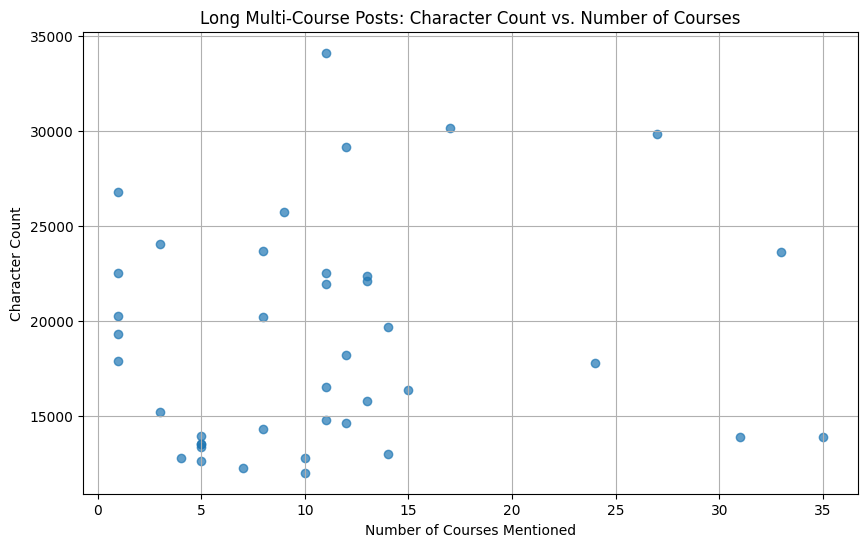

In [30]:
# Ivy - Long and MultiCourse Posts.ipynb — Scatter Plot Cell

import matplotlib.pyplot as plt

# === Scatter plot: Char_Count vs Num_Courses ===
plt.figure(figsize=(10, 6))
plt.scatter(df_long['Num_Courses'], df_long['Char_Count'], alpha=0.7)
plt.title("Long Multi-Course Posts: Character Count vs. Number of Courses")
plt.xlabel("Number of Courses Mentioned")
plt.ylabel("Character Count")
plt.grid(True)
plt.show()

In [34]:
# Ivy - Long and MultiCourse Posts.ipynb — CSV-like Textual Output

print("Num Courses,Character Count")
for idx, row in df_long.iterrows():
    print(f"{row['Num_Courses']},{row['Char_Count']}")

Num Courses,Character Count
11,34102
17,30128
27,29836
12,29144
1,26791
9,25733
3,24014
8,23670
33,23638
1,22498
11,22492
13,22360
13,22070
11,21911
1,20244
8,20208
14,19666
1,19282
12,18185
1,17907
24,17772
11,16536
15,16350
13,15794
3,15223
11,14755
12,14646
8,14331
5,13913
31,13879
35,13865
5,13525
5,13525
5,13338
14,12988
4,12799
10,12765
5,12607
7,12228
10,12005


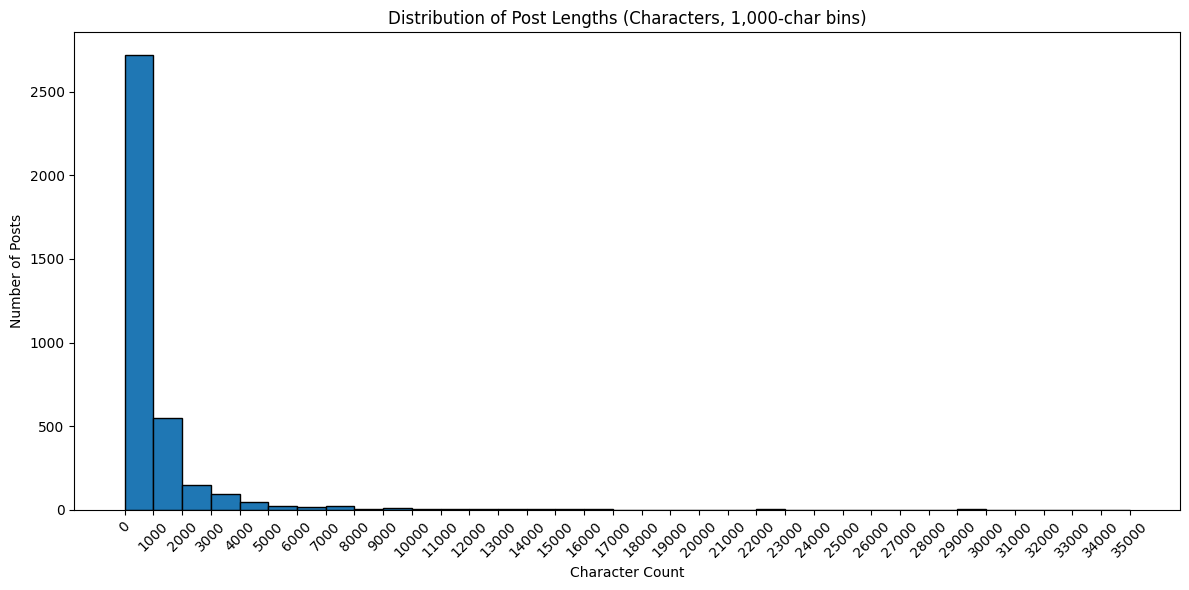

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# === Histogram with 1,000-char bins ===
bin_width = 1000
max_char = df_multi['Char_Count'].max()
bins = np.arange(0, max_char + bin_width, bin_width)

plt.figure(figsize=(12, 6))
plt.hist(df_multi['Char_Count'], bins=bins, edgecolor='black')
plt.title('Distribution of Post Lengths (Characters, 1,000-char bins)')
plt.xlabel('Character Count')
plt.ylabel('Number of Posts')
plt.xticks(bins, rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# === Total posts ===
total_posts = len(df_multi)
print(f"Total posts: {total_posts}")

# === Summary stats ===
char_stats = df_multi['Char_Count'].describe()
print("\n=== Post Length Summary Stats ===")
print(char_stats)

# === Q3 & IQR ===
q3 = char_stats['75%']
iqr = q3 - char_stats['25%']
print(f"\nQ3 (75th percentile): {q3:.2f}")
print(f"IQR: {iqr:.2f}")

# === Outlier threshold ===
outlier_threshold = q3 + 1.5 * iqr
print(f"Outlier threshold (Q3 + 1.5*IQR): {outlier_threshold:.2f} characters")

# === Count outliers ===
num_outliers = (df_multi['Char_Count'] > outlier_threshold).sum()
print(f"Number of posts above threshold: {num_outliers}")
print(f"Percentage of total: {num_outliers / total_posts:.2%}")

Total posts: 3672

=== Post Length Summary Stats ===
count     3672.000000
mean      1072.489107
std       2207.818938
min          4.000000
25%        240.000000
50%        471.000000
75%       1037.250000
max      34102.000000
Name: Char_Count, dtype: float64

Q3 (75th percentile): 1037.25
IQR: 797.25
Outlier threshold (Q3 + 1.5*IQR): 2233.12 characters
Number of posts above threshold: 350
Percentage of total: 9.53%


## focus on the outliers

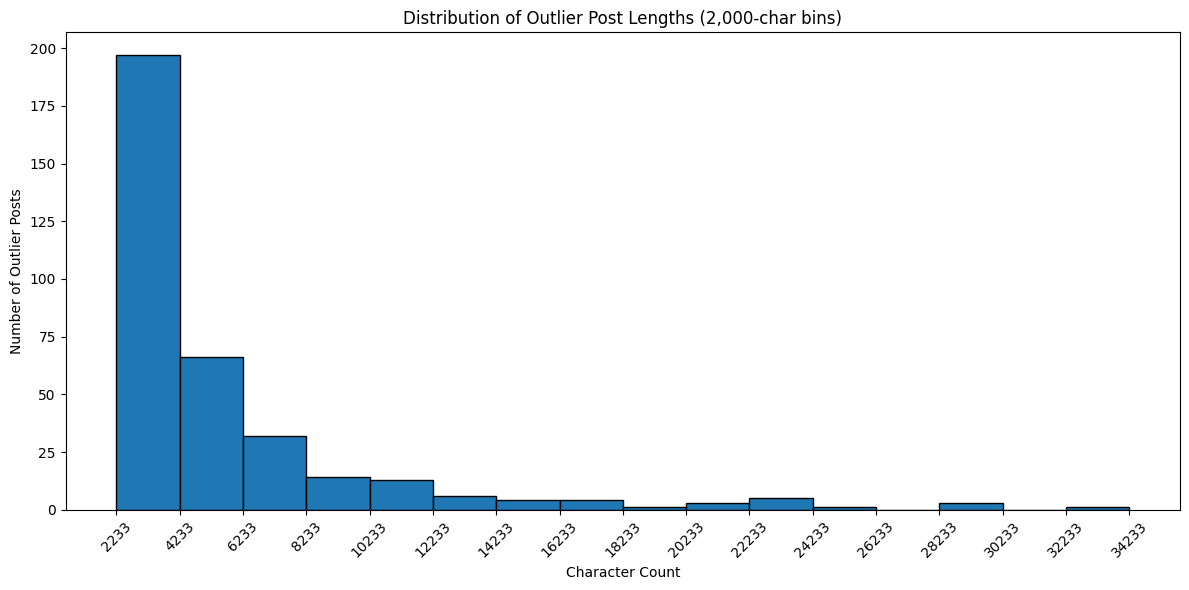

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# === Filter outliers ===
outlier_posts = df_multi[df_multi['Char_Count'] > outlier_threshold]

# === 2,000-char bins for long posts ===
bin_width = 2000
max_char_outliers = outlier_posts['Char_Count'].max()
bins_outliers = np.arange(outlier_threshold, max_char_outliers + bin_width, bin_width)

plt.figure(figsize=(12, 6))
plt.hist(outlier_posts['Char_Count'], bins=bins_outliers, edgecolor='black')
plt.title('Distribution of Outlier Post Lengths (2,000-char bins)')
plt.xlabel('Character Count')
plt.ylabel('Number of Outlier Posts')
plt.xticks(bins_outliers, rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# === Create df_long ===
df_long = df_multi[df_multi['Char_Count'] > 12000]

# === Count ===
num_long_posts = len(df_long)
print(f"Number of posts over 12,000 chars: {num_long_posts}")

# === Make a truncated preview column ===
df_long['Post_Preview'] = df_long['Post_Text'].str.slice(0, 200).str.replace('\n', ' ') + '...'

# === Display preview table ===
print("\nPreview of Long Posts (>12,000 chars):")
display(
    df_long
    .sort_values('Char_Count', ascending=False)
    [['Num_Courses', 'Char_Count', 'Post_Preview']]
    .reset_index(drop=True)
)

# === Export full version to CSV ===
output_path = "/Users/buddy/Desktop/WGU-Reddit/outputs/long_posts12k.csv"
df_long[['Num_Courses', 'Char_Count', 'Post_Text']].to_csv(output_path, index=False)
print(f"\nCSV exported to: {output_path}")

Number of posts over 12,000 chars: 29

Preview of Long Posts (>12,000 chars):


/var/folders/4k/nn6_64p916g2s6wytgx_n4rr0000gn/T/ipykernel_14068/4256501087.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['Post_Preview'] = df_long['Post_Text'].str.slice(0, 200).str.replace('\n', ' ') + '...'


,Num_Courses,Char_Count,Post_Preview
0,5,34102,"Tips for Accelerating Your MBA (or Not!) - Course Tips & Recommended Resources Let me start by saying this. I was what my mentor referred to as a ""super-accelerator."" I won't get into the exact timeli..."
1,1,30128,I finished this program today in a little over 3 months. I transferred 50 credits and work full time (Non IT). Here are my thoughts. Very long read! &#x200B; [Proof of Completion](https://preview.red...
2,4,29836,"Finished as someone with NO prior experience. Review of all classes. There are others that have made this post, but I think it would be helpful if people gave context to who they are and their level o..."
3,5,29144,"My Fun 41-Day MBA Journey - SO WORTH IT!!!!!! \*This is about my MBA journey, I hope to inspire, but don't be hard on yourself if your accelerated path is different\* I was highly motivated and in..."
4,2,25733,Success Story - 60k IT job 1 week after graduation!!! 1.5 terms nothing to FT Job Offer. Full accelerated-BSIT Write Up **Intro** Hi Night Owls! I'm a long-time lurker on this subreddit and I've bee...
5,3,24014,"D288 - Back-End Programming 2024 Guide! Hello fellow night owls! Hope you're having a fantastic semester. I finished this course about two months ago, and since I have time, I want to write up an upd..."
6,10,23638,"BSSWE Java Track Monster Guide and Review I finally graduated! After 3 terms, working full time at my job and as a father. I wanted to give back to the Reddit community, which I used extensively for a..."
7,1,22498,"D287 Java Frameworks Ultimate Project Guide WGU students, by now you have likely experienced or heard how this course is low effort, half finished garbage. Well, since they can't be bothered to fix th..."
8,5,22492,"WGU MBA - The ""Sort of"" Accelerated Adventure July seems to be a good month for me. July 2020, I graduated with a Bachelor's Degree from WGU in Business Management. After that was done, I wrote this p..."
9,5,22360,MBA (Master of Business Administration) Course MEGA Thread (Also relevant to some MSML classes) This is a guide to how I did my **MBA** at WGU (in **19 Days)** **I moved my post over from the other ...



CSV exported to: /Users/buddy/Desktop/WGU-Reddit/outputs/long_posts12k.csv


## extreme long posts over 12k: 29

In [24]:
# === Create notes template with Post ID ===
df_long_notes = df_long[['Post_ID', 'Num_Courses', 'Char_Count']].copy()
df_long_notes['Notes'] = ''  # Add empty Notes column

# === Export template to CSV ===
notes_path = "/Users/buddy/Desktop/WGU-Reddit/outputs/long_posts12k_notes.csv"
df_long_notes.to_csv(notes_path, index=False)
print(f"Notes template CSV exported to: {notes_path}")

# === Preview template ===
print("\nPreview of Notes Template:")
display(df_long_notes.head())

KeyError: "['Post_ID'] not in index"

In [15]:

# === Top examples ===
print("\nTop 10 longest posts:")
display(df_multi.sort_values('Char_Count', ascending=False)[['Num_Courses', 'Char_Count', 'Long_Flag', 'Post_Text']].head(10).reset_index(drop=True))

print("\nExample unusually long posts (flagged):")
display(df_multi[df_multi['Long_Flag']][['Num_Courses', 'Char_Count', 'Post_Text']].head(10).reset_index(drop=True))


Top 10 longest posts:


Num_Courses  Char_Count  Long_Flag  \
0            5       34102       True   
1            1       30128       True   
2            4       29836       True   
3            5       29144       True   
4            2       25733       True   
5            3       24014       True   
6           10       23638       True   
7            1       22498       True   
8            5       22492       True   
9            5       22360       True   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               


Example unusually long posts (flagged):


Num_Courses  Char_Count  \
0            1        2422   
1            1        6220   
2            1        2456   
3            1        2349   
4            1        5013   
5            1        3119   
6            1        2869   
7            1        4674   
8            1        3489   
9            1        5724   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [6]:
# === Ivy - Long and MultiCourse Posts.ipynb ===
# Initial merge, filter, sort for diary + multi-course post research (clean version)

import sqlite3
import pandas as pd
from pathlib import Path

# === Config ===
PROJECT_ROOT = Path("/Users/buddy/Desktop/WGU-Reddit")
DB_PATH = PROJECT_ROOT / "db" / "WGU-Reddit.db"
TOP20_CSV = PROJECT_ROOT / "data" / "output" / "reddit_top_20_mentioned_courses.csv"

# === Load both tables ===
with sqlite3.connect(DB_PATH) as conn:
    df_organic = pd.read_sql_query("SELECT post_id, title, selftext FROM posts", conn)
    df_organic['source'] = 'organic'

    df_keyword = pd.read_sql_query("SELECT post_id, title, selftext FROM posts_keyword", conn)
    df_keyword['source'] = 'keyword'

# === Combine & dedupe ===
df_combined = pd.concat([df_organic, df_keyword], ignore_index=True)
df_combined = df_combined.sort_values('source')  # keyword version first
df_combined = df_combined.drop_duplicates(subset=['post_id'], keep='first')

# === Combine title + text ===
df_combined['Post_Text'] = df_combined.apply(
    lambda r: f"{r['title']}\n{r['selftext']}".strip() if pd.notnull(r['selftext']) else r['title'].strip(),
    axis=1
)

# === Load Top 20 ===
top20_list = pd.read_csv(TOP20_CSV)['Course Code'].str.upper().unique().tolist()

# === Find courses ===
def find_courses(text):
    text_up = text.upper()
    return [code for code in top20_list if code in text_up]

df_combined['Course_Codes'] = df_combined['Post_Text'].apply(find_courses)
df_combined['Num_Courses'] = df_combined['Course_Codes'].apply(len)

# === Filter: must have at least 1 Top 20 code ===
df_multi = df_combined[df_combined['Num_Courses'] > 0].copy()

# === Add length ===
df_multi['Char_Count'] = df_multi['Post_Text'].str.len()

# === Sort ===
df_by_length = df_multi.sort_values('Char_Count', ascending=False)
df_by_num_courses = df_multi.sort_values('Num_Courses', ascending=False)

# === Expand text column display ===
pd.set_option('display.max_colwidth', None)

# === Inspect ===
print(f"Total posts with Top 20 match: {len(df_multi)}")

print("\nTop 10 longest posts:")
display(df_by_length[['Num_Courses', 'Char_Count', 'Post_Text']].head(10).reset_index(drop=True))

print("\nTop 10 posts with most course codes:")
display(df_by_num_courses[['Num_Courses', 'Char_Count', 'Post_Text']].head(10).reset_index(drop=True))

Total posts with Top 20 match: 3672

Top 10 longest posts:


Num_Courses  Char_Count  \
0            5       34102   
1            1       30128   
2            4       29836   
3            5       29144   
4            2       25733   
5            3       24014   
6           10       23638   
7            1       22498   
8            5       22492   
9            5       22360   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        


Top 10 posts with most course codes:


Num_Courses  Char_Count  \
0           11        2263   
1           11        1461   
2           10        3325   
3           10        1195   
4           10       23638   
5            9        1530   
6            9        1201   
7            8        2677   
8            8        9129   
9            8        2693   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume `df` is your DataFrame and `post_text` is the column with post content
df['post_length'] = df['post_text'].str.split().str.len()

# Summary stats
summary_stats = df['post_length'].describe()
iqr = summary_stats['75%'] - summary_stats['25%']

print("Summary statistics:")
print(summary_stats)
print(f"IQR: {iqr}")

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['post_length'], bins=30, edgecolor='black')
plt.title('Distribution of Post Lengths')
plt.xlabel('Post Length (words)')
plt.ylabel('Frequency')
plt.show()

NameError: name 'df' is not defined